# Requirements

keras==2.14.0

numpy==1.26.1

tensorflow==2.14.0

# convnets


**TRANSLATION INVARIANT**
- The patterns (edges, textures, colors) they learn are translation invariant. The network has the ability recognize the same pattern or feature regardless of its position in the input image.

**SPATIAL HIERARCHIES**
- They can learn spatial hierarchies of patterns. It is their ability to learn complex patterns or features by building upon simpler patterns detected at lower layers.

A convolutional neural network (CNN), which is specifically designed to work with image data. It's more suitable for tasks where the input data is structured in multiple dimensions, such as images represented as grids of pixels.

**Conv2D**

- a fundamental building block used for feature extraction from input images. 
- Convolution Operation: At its core, the Conv2D layer performs a convolution operation between the input image and a set of learnable filters (also known as kernels or convolutional kernels). Each filter is a small matrix of weights.
- Feature Map: The convolution operation is applied by sliding each filter over the input image and computing the dot product between the filter and the input patch at each position. This produces a feature map, which is a 2D representation of the activations of that filter across the input image.
- Multiple Filters: Typically, a Conv2D layer has multiple filters, and each filter learns to detect a different pattern or feature in the input image. For example, early filters might learn to detect edges or corners, while deeper filters might learn more complex patterns.
- Parameters: The weights of the filters in the Conv2D layer are the parameters that are learned during the training process. The goal of training is to learn filters that can extract meaningful features from the input images for the task at hand (e.g., classification, object detection).
- Padding: Optionally, the Conv2D layer can apply padding to the input image before performing the convolution operation. Padding adds extra rows and columns of zeros around the input image, which helps preserve spatial dimensions and prevent information loss at the edges of the image.
- Strides: Additionally, the Conv2D layer can use a stride parameter to specify the step size of the filter as it slides over the input image. Larger stride values result in downsampling of the feature map, reducing its spatial dimensions.

`Conv2D(output_depth, (window_height, window_width))`

`input_shape=(image_height, image_width, image_channels)`

Example:
- output_depth = 32: This number represents the number of filters (also known as kernels or convolutional channels) in the convolutional layer. Each filter is a small matrix that is applied to the input image to extract features. Having multiple filters allows the network to learn different features at each location in the input image. In this case, there are 32 filters in the convolutional layer.
- (window_height, window_width) = (3, 3): This tuple represents the size of each filter in the convolutional layer. Each filter is a small matrix with dimensions specified by this tuple. In this case, each filter is a 3x3 matrix.

`model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))`

**MaxPooling2D**
- a convolutional neural network (CNN) is to downsample the input representation, reducing its spatial dimensions. This helps in reducing the computational complexity of the network, as well as providing a form of translation invariance.
- Here's how the MaxPooling2D layer works: It operates on each feature map independently. For each region of the input feature map specified by the pool size (in this case, (2, 2)), the maximum value within that region is retained. The output of the operation is a downsampled version of the input feature map, where the spatial dimensions are reduced by a factor determined by the pool size.
- For example, if you have a (6, 6) input feature map and apply MaxPooling2D((2, 2)), you'll get a (3, 3) output feature map, as each (2, 2) region is reduced to a single value (the maximum value in that region).
- The purpose of this downsampling operation is to: Reduce the number of parameters in the network, thus reducing computational complexity and memory requirements. Increase the receptive field of later layers, allowing them to capture more abstract features by aggregating information from larger regions of the input. Provide a form of translation invariance, making the network more robust to small variations in the position of features within the input images.

`model.add(layers.MaxPooling2D((2, 2)))`

The output of MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The 3D (3, 3, 32) outputs are flattened into 1D vector of shape (288,) before going through two Dense layers.

`model.add(layers.Flatten())`

The next step is to feed the last output tensor (of shape (3, 3, 32)) into a densely connected classifier network. Do i.e. the 10-way classification, using a final layer with 10 outputs and a softmax activation.

`model.add(layers.Dense(64, activation='relu'))`
`model.add(layers.Dense(10, activation='softmax'))`

See the model architecture:

`model.summary()`


## Train CNN with TensorFlow

In [21]:

import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [22]:

def prepare_images_for_convnet(dir_images: str, images_names: list[str]) -> np.array:
    print(f"Preparing images form directory {dir_images}")
          
    loaded_images: list[np.ndarray] = list()
    
    for image_name in images_names:
        image: np.ndarray = cv2.imread(dir_images + image_name)

        try:
            image: np.ndarray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image: np.ndarray = image / 255.0  # Normalize pixel values to [0, 1]

            loaded_images.append(image)

        except Exception as e:
            print(f"Unable to load image {image_name}, {e}")

    loaded_images = np.array(loaded_images)

    print(f"Expected no. of images: {len(images_names)}")
    print(f"Loaded no. of images: {len(loaded_images)}")

    image_sample: np.ndarray = loaded_images[0]

    # Plot the image
    plt.imshow(image_sample)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    return loaded_images


Preparing images form directory ./data/images_with_padding/cup/
Expected no. of images: 12
Loaded no. of images: 12


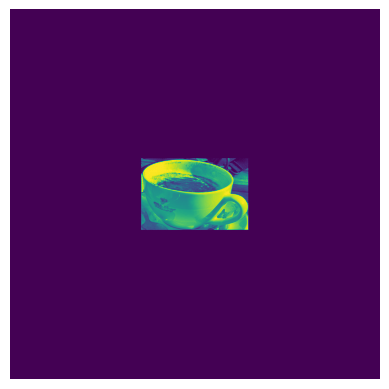

Preparing images form directory ./data/images_with_padding/cup/
Expected no. of images: 6
Loaded no. of images: 6


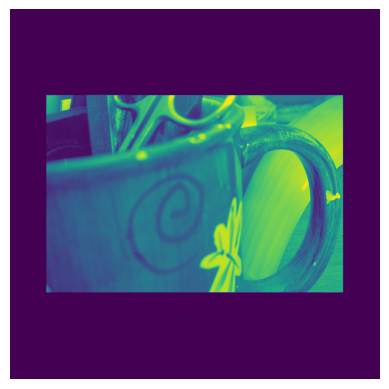

Preparing images form directory ./data/images_with_padding/apple/
Expected no. of images: 12
Loaded no. of images: 12


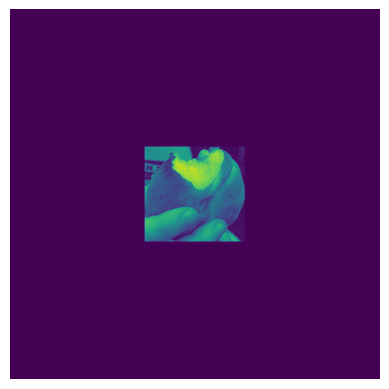

Preparing images form directory ./data/images_with_padding/apple/
Expected no. of images: 6
Loaded no. of images: 6


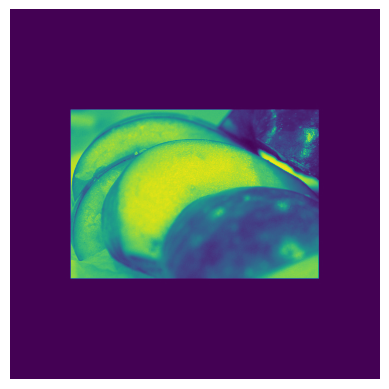

In [5]:

# load data
base_path: str = "./data/images_with_padding/"

train_images_names_cup: list[str] = [
    "cropped_train_image_cropped_train_image_127_0.jpg",
    "cropped_train_image_cropped_train_image_3464_0.jpg",
    "cropped_train_image_cropped_train_image_3703_0.jpg",
    "cropped_train_image_cropped_train_image_4108_0.jpg",
    "cropped_train_image_cropped_train_image_5352_0.jpg",
    "cropped_train_image_cropped_train_image_7241_0.jpg",
    "cropped_train_image_cropped_train_image_7946_0.jpg",
    "cropped_train_image_cropped_train_image_9156_0.jpg",
    "cropped_train_image_cropped_train_image_12349_0.jpg",
    "cropped_train_image_cropped_train_image_12422_0.jpg",
    "cropped_train_image_cropped_train_image_12930_0.jpg",
    "cropped_train_image_cropped_train_image_16796_0.jpg"
]

test_images_names_cup: list[str] = [
    "cropped_train_image_cropped_train_image_175743_0.jpg",
    "cropped_train_image_cropped_train_image_175604_0.jpg",
    "cropped_train_image_cropped_train_image_173684_0.jpg",
    "cropped_train_image_cropped_train_image_171081_0.jpg",
    "cropped_train_image_cropped_train_image_201035_0.jpg",
    "cropped_train_image_cropped_train_image_170712_0.jpg"
]

cups_images_path: str = base_path + "cup/"

train_cups_images: np.array = prepare_images_for_convnet(cups_images_path, train_images_names_cup)
train_cups_images_labels: np.ndarray = np.ones(12, dtype=np.uint8)

test_cups_images: np.array = prepare_images_for_convnet(cups_images_path, test_images_names_cup)
test_cups_images_labels: np.ndarray = np.ones(6, dtype=np.uint8)

train_images_names_apple: list[str] = [
    "cropped_train_image_cropped_train_image_2892_0.jpg",
    "cropped_train_image_cropped_train_image_2902_0.jpg",
    "cropped_train_image_cropped_train_image_6753_1.jpg",
    "cropped_train_image_cropped_train_image_7934_0.jpg",
    "cropped_train_image_cropped_train_image_8691_4.jpg",
    "cropped_train_image_cropped_train_image_9038_0.jpg",
    "cropped_train_image_cropped_train_image_9511_0.jpg",
    "cropped_train_image_cropped_train_image_10196_0.jpg",
    "cropped_train_image_cropped_train_image_10478_0.jpg",
    "cropped_train_image_cropped_train_image_12073_1.jpg",
    "cropped_train_image_cropped_train_image_14783_0.jpg",
    "cropped_train_image_cropped_train_image_15953_0.jpg"
]

test_images_names_apple: list[str] = [
    "cropped_train_image_cropped_train_image_366493_2.jpg",
    "cropped_train_image_cropped_train_image_363574_13.jpg",
    "cropped_train_image_cropped_train_image_363574_9.jpg",
    "cropped_train_image_cropped_train_image_363574_2.jpg",
    "cropped_train_image_cropped_train_image_360948_0.jpg",
    "cropped_train_image_cropped_train_image_360020_0.jpg"
]

apples_images_path: str = base_path + "apple/"

train_apples_images: np.array = prepare_images_for_convnet(apples_images_path, train_images_names_apple)
train_apples_images_labels: np.ndarray = np.ones(12, dtype=np.uint8) * 2

test_apples_images: np.array = prepare_images_for_convnet(apples_images_path, test_images_names_apple)
test_apples_images_labels: np.ndarray = np.ones(6, dtype=np.uint8) * 2


In [6]:

# merge data
train_images = np.concatenate((train_cups_images, train_apples_images))
del train_apples_images
del train_cups_images

train_labels = np.concatenate((train_cups_images_labels, train_apples_images_labels))
del train_apples_images_labels
del train_cups_images_labels

test_images = np.concatenate((test_cups_images, test_apples_images))
del test_apples_images
del test_cups_images

test_labels = np.concatenate((test_cups_images_labels, test_apples_images_labels))
del test_apples_images_labels
del test_cups_images_labels


In [7]:

#### NO.  INPUT CHANNELS  ####

# greyscale
num_input_channels_1 = 1

#### CONVOLUTIONAL FILTER LAYER 1 ####

# First Convolutional Layer:
# For the first convolutional layer, it's common to use smaller filter sizes such as 3x3 or 5x5.
# Smaller filter sizes help capture local patterns and details in the input images while keeping the number of parameters manageable.
# Starting with a smaller filter size allows the network to learn basic features and patterns from the input images.
# Deepest Convolutional Layer:
# In deeper layers of the network, you may use larger filter sizes to capture more complex and abstract features.
# Larger filter sizes, such as 5x5 or 7x7, can capture more global features in the input images and help in learning high-level representations.
# Deeper layers are typically responsible for extracting more abstract and high-level features from the input data.

conv2d_filter_size_1 = [5, 5]

#### OUTPUT DEPTH CONV2D LAYER 1 ####

# output_depths, no. of filtes computed by the convolution, when no padding apllied and stride is set to 1
# output_channels = Input size − Filter size + 1
# output_channels = 680 - 5 + 1 = 676

#### WEIGHTS CONV2D LAYER 1 ####

# initialize weights = convolutional filter/kernel

# tf.truncated_normal(conv2d_filter_shape_1, stddev=0.03): This part generates a tensor containing random values from a 
# truncated normal distribution. The shape of the tensor is specified by conv2d_filter_shape_1, which likely represents 
# the shape of the convolutional filter. The stddev parameter specifies the standard deviation of the normal distribution.

# A truncated normal distribution is a probability distribution derived from the normal distribution (also known as the Gaussian distribution).
# However, unlike the standard normal distribution, which ranges from negative infinity to positive infinity, the truncated normal 
# distribution is limited to a specified range.

# stddev = 0.03
# The choice of the stddev parameter in the truncated normal distribution used for initializing weights in neural networks is typically 
# determined empirically or based on best practices. While there is no strict rule for setting the standard deviation, a smaller value 
# is often chosen to ensure that the initial weights are relatively close to zero and do not cause the activation functions to saturate.

# (5, 5, 1, 50) conv2d_filter_shape_1 [filter_height, filter_width, input_channels, output_channels]
conv2d_weights_1 = tf.Variable(tf.random.truncated_normal((5, 5, 1, 676), stddev=0.03), name='conv2d_weights_1')

#### BIAS CONV2D LAYER 1 ####

# a TensorFlow variable representing the biases of a convolutional layer. These biases will be learned and updated during the training 
# process to optimize the performance of the neural network model. Biases provide the model with flexibility to account for variations and 
# offsets in the data that cannot be captured by the weights alone.

# Mathematically, this step can be represented as adding a constant value (the bias) to each element of the output feature maps.
# By adding biases to the output of the convolution operation, the model gains additional degrees of freedom to learn and represent complex relationships in 
# the data. This helps improve the expressiveness and flexibility of the neural network, allowing it to better capture the underlying patterns and make more 
# accurate predictions.

conv2d_bias_1 = tf.Variable(tf.random.truncated_normal([676], stddev=0.03), name='conv2d_bias_1')


In [8]:

#### CONV2D LAYER 1 ####

# Define the input placeholder
# batch size of input data (4,)
train_x_placeholder_1 = tf.random.normal((4,) + (680, 680, 1))
# x_shaped = tf.reshape(x, [-1, 28, 28, 1])

# input layer
# [1, 1, 1, 1]: This parameter specifies the strides for the convolution operation along each dimension of the input tensor. The values [1, 1, 1, 1] 
# indicate that the stride is 1 in all dimensions: batch, height, width, and channels. This means that the convolutional filter moves one pixel at a 
# time in each direction.

# If you do not want to use padding in the convolution operation and prefer to keep the spatial dimensions of the output feature maps smaller than 
# those of the input, you should set the padding parameter to 'VALID'.

# This is a low-level API provided by TensorFlow
conv2d_layer_1 = tf.nn.conv2d(input=train_x_placeholder_1, filters=conv2d_weights_1, strides=(1, 1, 1, 1), padding = 'VALID')

# This is a high-level API provided by Keras, which is integrated into TensorFlow. It's part of the Keras API.
# conv2d_layer = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))

# The step conv2d_layer_1 += conv2d_bias_1 is performing bias addition in a convolutional layer

conv2d_layer_1 += conv2d_bias_1
conv2d_layer_1 = tf.nn.relu(conv2d_layer_1)

conv2d_layer_output_shape_1 = tf.shape(conv2d_layer_1)
conv2d_layer_output_shape_1


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 676, 676, 676], dtype=int32)>

In [9]:

#### OUTPUT FETURE MAP CONV2D LAYER 1 ####

# Feature map size = (Input size − Kernel size + 2*Padding / 1) + 1

# Example 1: picture 6x6 px, kernel 3x3, outputs 16 filters, feature map size 4x4
# -> Feature map size = (6 − 3 + 2×0 / 1) + 1 = 4

# current implementation
# output_channels / filters = 680 - 5 + 1 = 676
# feature map size = ( 680px image - 5 kernel size + 2x0 / 1) + 1 = 676

#### EXAMPLE KERAS ####

# Example Keras
# 50 = output depth
# (5, 5) convolutional filter
# some keras example: model.add(layers.Conv2D(50, (5, 5), activation='relu', input_shape=(680, 680, 1)))


In [10]:

#### MAX POOLING LAYER 1 ####

# ksize: The first and last elements are typically set to 1 to indicate that we do not want to pool over the batch and channel dimensions. pool_height and 
# pool_width are the height and width of the pooling window.

# 2x2 Pooling: This is perhaps the most commonly used pool size. It's often applied after convolutional layers to reduce spatial dimensions while 
# retaining important features. For example, after a convolutional layer with a 3x3 kernel and a stride of 1, applying 2x2 max pooling with a stride of 
# 2 will reduce the spatial dimensions by half.
# 3x3 Pooling: Although less common than 2x2 pooling, 3x3 pooling is sometimes used, especially in deeper networks or when larger receptive fields are 
# desired. It provides a slightly larger pooling region, which can help capture more contextual information.
# 4x4 Pooling or Higher: Pool sizes larger than 3x3 are less common but may be used in specific architectures or tasks where larger receptive fields 
# are beneficial. These larger pooling regions lead to more aggressive spatial downsampling and may result in more loss of spatial information.

# max_pooling2D_filter_size_1 = [2, 2], thus ksize=[1, 2, 2, 1]

max_pooling2D_layer_1 = tf.nn.max_pool(conv2d_layer_1, 
                                       ksize=[1, 2, 2, 1],
                                       strides=[1, 2, 2, 1],
                                       padding='VALID'
                                      )

#### OUTPUT FETURE MAP MAX POOLING LAYER 1 ####

# Example 1
# Having picture 6x6, 1 channel because greyscale,  kernel size 3x3, no of filters is 16, feature map size is 4x4. After applying max pooling 2x2, 
# feature maps size is 2x2.

#### EXAMPLE KERAS ####

# keras example: model.add(layers.MaxPooling2D((2, 2)))

# current implementation
# 676 x 676 feature map of conv 2D
# after applying the max poling, the feature map size is:
# output_size = (input_size - kernel_size) / stride + 1
# output_size = (676 - 2) / 2 + 1 = 338

max_pooling2D_layer_output_shape_1 = tf.shape(max_pooling2D_layer_1)
max_pooling2D_layer_output_shape_1


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 338, 338, 676], dtype=int32)>

In [11]:

#### CONVOLUTIONAL FILTER LAYER 2 ####

conv2d_filter_size_2 = [7, 7]

#### OUTPUT DEPTH LAYER 2 ####

# 676
# output of the conv2d layer 1

#### WEIGHTS CONV2D LAYER 2 ####

conv2d_weights_2 = tf.Variable(tf.random.truncated_normal((7, 7, 1, 676), stddev=0.03), name='conv2d_weights_2')

#### BIAS CONV2D LAYER 2 ####

conv2d_bias_2 = tf.Variable(tf.random.truncated_normal([676], stddev=0.03), name='conv2d_bias_2')


In [12]:

#### CONV2D LAYER 2 ####

# train_x_placeholder_2 is the output of the max pool layer
# max_pooling2D_layer_1

conv2d_layer_2 = tf.nn.conv2d(input=max_pooling2D_layer_1, filters=conv2d_weights_2, strides=(1, 1, 1, 1), padding = 'VALID')

conv2d_layer_2 += conv2d_bias_2
conv2d_layer_2 = tf.nn.relu(conv2d_layer_2)

conv2d_layer_output_shape_2 = tf.shape(conv2d_layer_2)
conv2d_layer_output_shape_2


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 332, 332, 676], dtype=int32)>

In [13]:

#### MAX POOLING LAYER 2 ####

# max_pooling2D_filter_size_1 = [2, 2], thus ksize=[1, 2, 2, 1]

max_pooling2D_layer_2 = tf.nn.max_pool(conv2d_layer_2, 
                                       ksize=[1, 2, 2, 1],
                                       strides=[1, 2, 2, 1],
                                       padding='VALID'
                                      )

max_pooling2D_layer_output_shape_2 = tf.shape(max_pooling2D_layer_2)
max_pooling2D_layer_output_shape_2


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([  4, 166, 166, 676], dtype=int32)>

In [15]:

#### FLATTEN LAYER ####

flatten_layer_new_shape = [max_pooling2D_layer_output_shape_2[0], tf.reduce_prod(max_pooling2D_layer_output_shape_2[1:])]
flattened_layer = tf.reshape(max_pooling2D_layer_2, flatten_layer_new_shape)

flatten_layer_output_shape = tf.shape(flattened_layer)
flatten_layer_output_shape


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([       4, 18627856], dtype=int32)>

In [16]:

# For example, you could start with a number like 64 or 128 units for the dense layer. These numbers are often used as a starting point for small 
# to medium-sized datasets.

dense_layer_units_1=128

dense_layer_input_size_1 = flattened_layer.shape[1]  # 18627856

dense_layer_weights_1 = tf.Variable(tf.random.normal(shape=(dense_layer_input_size_1, dense_layer_units_1), stddev=0.1))
dense_layer_bias_1 = tf.Variable(tf.zeros(shape=(dense_layer_units_1,)))

# In the context of neural network, z typically refers to the output of a layer before applying the activation function.
dot_product = tf.matmul(flattened_layer, dense_layer_weights_1) + dense_layer_bias_1

dense_layer_1 = tf.nn.relu(dot_product)

dense_layer_output_shape_1 = tf.shape(dense_layer_1)
dense_layer_output_shape_1


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([  4, 128], dtype=int32)>

In [19]:

dense_layer_units_2 = 2

dense_layer_weights_2 = tf.Variable(tf.random.normal(shape=(dense_layer_units_1, dense_layer_units_2), stddev=0.1))
dense_layer_bias_2 = tf.Variable(tf.zeros(shape=(dense_layer_units_2,)))

# In the context of neural network, z typically refers to the output of a layer before applying the activation function.
dot_product_2 = tf.matmul(dense_layer_1, dense_layer_weights_2) + dense_layer_bias_2

dense_layer_2 = tf.nn.softmax(dot_product_2)

dense_layer_output_shape_2 = tf.shape(dense_layer_2)
dense_layer_output_shape_2


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 2], dtype=int32)>

In [ ]:

# This code is setting up a TensorFlow computation graph for training a neural network using the cross-entropy loss function with the Adam optimizer.

# This calculates the cross-entropy loss between the predicted logits (dense_layer2) and the true labels (y). tf.nn.softmax_cross_entropy_with_logits computes the softmax 
# cross-entropy loss, and tf.reduce_mean computes the mean of all the elements in the tensor, which effectively averages the loss over the entire batch.

y = tf.placeholder(tf.float32, [None, 2])

cross_entropy = tf.reduce_mean(
   tf.nn.softmax_cross_entropy_with_logits(logits = dense_layer2, labels = y))

optimiser = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()



In [ ]:
tf.summary.scalar('accuracy', accuracy)
   merged = tf.summary.merge_all()
   writer = tf.summary.FileWriter('E:\TensorFlowProject')
   
   with tf.Session() as sess:
      sess.run(init_op)
      total_batch = int(len(mnist.train.labels) / batch_size)
      
      for epoch in range(epochs):
         avg_cost = 0
      for i in range(total_batch):
         batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
            _, c = sess.run([optimiser, cross_entropy], feed_dict = {
            x:batch_x, y: batch_y})
            avg_cost += c / total_batch
         test_acc = sess.run(accuracy, feed_dict = {x: mnist.test.images, y:
            mnist.test.labels})
            summary = sess.run(merged, feed_dict = {x: mnist.test.images, y:
            mnist.test.labels})
         writer.add_summary(summary, epoch)

   print("\nTraining complete!")
   writer.add_graph(sess.graph)
   print(sess.run(accuracy, feed_dict = {x: mnist.test.images, y:
      mnist.test.labels}))

# Train CNN with Keras

In [290]:

from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import Adam
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

## Example - MNIST dataset

In [181]:

(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()

In [182]:

len(train_images_mnist)

60000

In [183]:

len(train_images_mnist[0])

28

In [231]:

type(train_images_mnist)


numpy.ndarray

In [184]:

train_images_mnist.shape


(60000, 28, 28)

In [204]:

len(train_labels_mnist)

60000

In [205]:

len(train_labels_mnist[0])

TypeError: object of type 'numpy.uint8' has no len()

In [206]:

train_labels_mnist[0]


5

In [222]:

train_labels_mnist.shape

(60000,)

In [261]:

# resape and scale
train_images_mnist_reshaped = train_images_mnist.reshape((60000, 28 * 28))

# Since pixel values in typical images are in the range of 0 to 255 (for 8-bit images), dividing by 255 scales the pixel values to 
# the range [0, 1]. This is known as normalization.
train_images_mnist_normalized = train_images_mnist_reshaped.astype('float32') / 255

# test_images = test_images.reshape((10000, 28 * 28))
# test_images = test_images.astype('float32') / 255


In [262]:
train_images_mnist_normalized.shape

(60000, 784)

In [ ]:

# The function to_categorical is typically used when dealing with classification tasks
# It converts class labels into one-hot encoded vectors

# In classification tasks, especially with neural networks, the output layer usually has neurons corresponding to each class. 
# For example, if you have 10 classes, you would have 10 output neurons, each representing the probability of belonging to a particular class.

# One-hot encoding is a binary representation of categorical variables where each class is represented by a binary vector. 
# In this representation, only one bit is high (1) while all others are low (0). This helps the network to understand the categorical 
# nature of the output and interpret it correctly during training.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Scaling Test

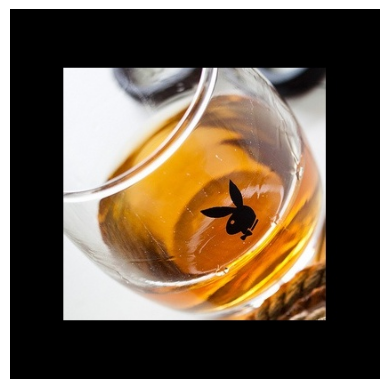

In [47]:

# the typical data structure for the training images would be a 4-dimensional NumPy array, commonly referred to as a tensor.
images = []

image: np.ndarray = cv2.imread("data/images_with_padding/cup/" + "cropped_train_image_cropped_train_image_12422_0.jpg")
# image: np.ndarray = cv2.imread("data/cleaned_images/cup/" + "cropped_train_image_12422_0.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0
image = image.astype(np.float32)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

images.append(image)
images = np.array(images)


In [48]:
# original array([1.        , 0.9254902 , 0.45490196], dtype=float32)

# below with padding
images[0][208, 208]

array([0.7764706 , 0.45882353, 0.03921569], dtype=float32)

## Train, test split

To train an image-classification model, using very little data. You’ll sometimes hear that deep learning only works when lots of data is available. But what constitutes lots of samples is relative—relative to the size and depth of the network you’re trying to train, for starters. Because conv- nets learn local, translation-invariant features, they’re highly data efficient on percep- tual problems.
- classes: cup and apple
    - pictures for training i.e. 32 + 32
    - pictures for training i.e. 32 + 32
    - pictures for testing i.e. 10 + 10

Start with the training without any regularization, to set a base-line for what can be achieved. At that point, the main issue will be overfitting.

In [232]:

# Each split contains the same number of samples from each class: 
# this is a balanced binary-classification problem, which means classification 
# accuracy will be an appropriate measure of success.

# Read the picture files.
# Decode the JPEG content to RGB grids of pixels.
# Convert these into floating-point tensors.
# Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal 
# with small input values).

cups_images_names = []
apples_images_names = []

for image_name in os.listdir("data/images_with_padding/cup"):
    if image_name != ".DS_Store":
        cups_images_names.append(image_name)

for image_name in os.listdir("data/images_with_padding/apple"):
    if image_name != ".DS_Store":
        apples_images_names.append(image_name)
    
train_cups_images_names = cups_images_names[:32]

validate_cups_images_names = cups_images_names[32:64]

test_cups_images_names = cups_images_names[64:72]

print(f"total train cup images {len(train_cups_images_names)}")
print(train_cups_images_names)
print(f"total validate cup images {len(validate_cups_images_names)}")
print(validate_cups_images_names)
print(f"total test cup images {len(test_cups_images_names)}")
print(test_cups_images_names)

train_apples_images_names = apples_images_names[:32]

validate_apples_images_names = apples_images_names[32:64]

test_apples_images_names = apples_images_names[64:72]

print(f"total train apple images {len(train_apples_images_names)}")
print(train_apples_images_names)
print(f"total validate apple images {len(validate_apples_images_names)}")
print(validate_apples_images_names)
print(f"total test apple images {len(test_apples_images_names)}")
print(test_apples_images_names)

total train cup images 32
['cropped_train_image_cropped_train_image_193347_0.jpg', 'cropped_train_image_cropped_train_image_42540_0.jpg', 'cropped_train_image_cropped_train_image_60088_0.jpg', 'cropped_train_image_cropped_train_image_177107_0.jpg', 'cropped_train_image_cropped_train_image_210108_0.jpg', 'cropped_train_image_cropped_train_image_180208_0.jpg', 'cropped_train_image_cropped_train_image_160944_0.jpg', 'cropped_train_image_cropped_train_image_101715_0.jpg', 'cropped_train_image_cropped_train_image_99626_0.jpg', 'cropped_train_image_cropped_train_image_95908_0.jpg', 'cropped_train_image_cropped_train_image_198635_0.jpg', 'cropped_train_image_cropped_train_image_126719_0.jpg', 'cropped_train_image_cropped_train_image_202998_0.jpg', 'cropped_train_image_cropped_train_image_75258_13.jpg', 'cropped_train_image_cropped_train_image_33581_0.jpg', 'cropped_train_image_cropped_train_image_188084_0.jpg', 'cropped_train_image_cropped_train_image_57166_0.jpg', 'cropped_train_image_croppe

### Train

In [233]:

def load_images(dir_images1: str, dir_images2: str, images_names1: list[str], images_names2: list[str]) -> list[np.ndarray]:
    loaded_images: list[np.ndarray] = list()
    images_labels: list[int] = []
    
    print(f"Preparing images from directory {dir_images1}")
    
    for image_name in images_names1:
        loaded_images.append(cv2.cvtColor(cv2.imread(dir_images1 + image_name), cv2.COLOR_BGR2RGB))
        images_labels.append(1)
        
    print(f"Preparing images from directory {dir_images2}")
    
    for image_name in images_names2:
        loaded_images.append(cv2.cvtColor(cv2.imread(dir_images2 + image_name), cv2.COLOR_BGR2RGB))
        images_labels.append(2)
        
    print(f"Expected no. of images: {len(images_names1)+len(images_names2)}")
    print(f"Loaded no. of images: {len(loaded_images)}")
    print(f"No. of generated labels {len(images_labels)}")

    image_sample: np.ndarray = loaded_images[0]

    # Plot the image
    plt.imshow(image_sample)
    plt.axis('off')  # Turn off axis labels
    plt.show()
        
    return np.array(loaded_images), np.array(images_labels, dtype=np.uint8)
        

Preparing images from directory data/images_with_padding/cup/
Preparing images from directory data/images_with_padding/apple/
Expected no. of images: 64
Loaded no. of images: 64
No. of generated labels 64


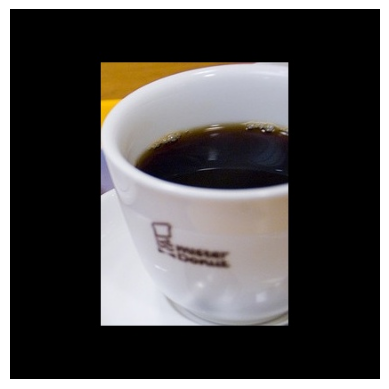

In [265]:

train_images, train_labels = load_images("data/images_with_padding/cup/", "data/images_with_padding/apple/", train_cups_images_names, train_apples_images_names)

In [235]:

len(train_images)


64

In [236]:

len(train_images[0])


416

In [237]:
type(train_images)

numpy.ndarray

In [238]:

train_images.shape


(64, 416, 416, 3)

In [249]:

train_images[0].shape


(416, 416, 3)

In [239]:

train_images[0][208, 208]


array([215, 215, 225], dtype=uint8)

In [240]:

# del train_cups_images_names
# del train_apples_images_names


In [241]:

len(train_labels[0])


TypeError: object of type 'numpy.uint8' has no len()

In [242]:

train_labels.shape


(64,)

### Validate

Preparing images from directory data/images_with_padding/cup/
Preparing images from directory data/images_with_padding/apple/
Expected no. of images: 64
Loaded no. of images: 64
No. of generated labels 64


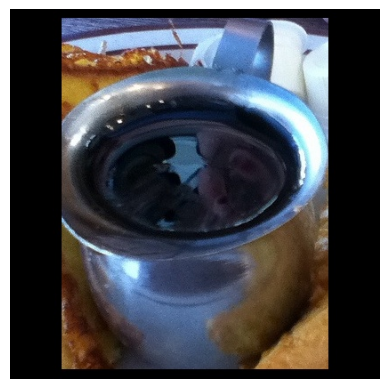

In [266]:

validate_images, validate_labels = load_images("data/images_with_padding/cup/", "data/images_with_padding/apple/", validate_cups_images_names, validate_apples_images_names)

In [244]:

validate_images[0][208, 208]


array([24, 30, 42], dtype=uint8)

In [218]:
# del validate_cups_images_names
# del validate_apples_images_names

### Test

Preparing images from directory data/images_with_padding/cup/
Preparing images from directory data/images_with_padding/apple/
Expected no. of images: 16
Loaded no. of images: 16
No. of generated labels 16


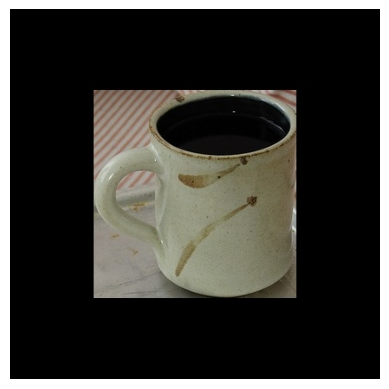

In [267]:

test_images, test_labels = load_images("data/images_with_padding/cup/", "data/images_with_padding/apple/", test_cups_images_names, test_apples_images_names)

In [256]:
len(test_images)

16

In [220]:

test_images[0][208, 208]


array([142, 146, 123], dtype=uint8)

In [221]:
# del test_apples_images_names
# del test_cups_images_names

## Normalization

In [273]:

# Since pixel values in typical images are in the range of 0 to 255 (for 8-bit images), dividing by 255 scales the pixel values to 
# the range [0, 1]. This is known as normalization.
train_images_normalized = train_images.astype('float32') / 255
validate_images_normalized = validate_images.astype('float32') / 255
test_images_normalized = test_images.astype('float32') / 255


In [274]:
train_images_normalized.shape

(64, 416, 416, 3)

## Reshaping

In [279]:

# resape and scale

train_images_reshaped = train_images_normalized.reshape((64, 416 * 416 * 3))
validate_images_reshaped = validate_images_normalized.reshape((64, 416 * 416 * 3))
test_images_reshaped = test_images_normalized.reshape((16, 416 * 416 * 3))


In [280]:
train_images_reshaped.shape

(64, 519168)

## Batches

In [7]:

# # data batch shape: (20, 150, 150, 3)

# # Define batch size
# batch_size = 8

# # Calculate the number of batches
# num_batches = len(train_images) // batch_size

# # Create a list to store batches
# train_images_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = train_images[batch_start:batch_end]
    
#     train_images_batches.append(batch)

# train_images_batches = np.array(train_images_batches)

In [8]:

# # data batch shape: (20, 150, 150, 3)

# # Define batch size
# batch_size = 8

# # Calculate the number of batches
# num_batches = len(train_labels) // batch_size

# # Create a list to store batches
# train_labels_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = train_labels[batch_start:batch_end]
    
#     train_labels_batches.append(batch)

# train_labels_batches = np.array(train_labels_batches)

In [9]:

# # Calculate the number of batches
# num_batches = len(validate_images) // batch_size

# # Create a list to store batches
# validate_images_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = validate_images[batch_start:batch_end]
    
#     validate_images_batches.append(batch)

# validate_images_batches = np.array(validate_images_batches)

In [10]:
# # data batch shape: (20, 150, 150, 3)

# # Define batch size
# batch_size = 8

# # Calculate the number of batches
# num_batches = len(validate_labels) // batch_size

# # Create a list to store batches
# validate_labels_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = validate_labels[batch_start:batch_end]
    
#     validate_labels_batches.append(batch)

# validate_labels_batches = np.array(validate_labels_batches)

In [11]:

# # Calculate the number of batches
# num_batches = len(test_images) // batch_size

# # Create a list to store batches
# test_images_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = test_images[batch_start:batch_end]
    
#     test_images_batches.append(batch)

# test_images_batches = np.array(test_images_batches)


In [12]:
# # data batch shape: (20, 150, 150, 3)

# # Define batch size
# batch_size = 8

# # Calculate the number of batches
# num_batches = len(test_labels) // batch_size

# # Create a list to store batches
# test_labels_batches = []

# # Split the dataset into batches
# for i in range(num_batches):
#     batch_start = i * batch_size
#     batch_end = (i + 1) * batch_size
    
#     batch = test_labels[batch_start:batch_end]
    
#     test_labels_batches.append(batch)

# test_labels_batches = np.array(test_labels_batches)

## Nework architecture

In [281]:

print(len(train_images_normalized))
print(train_images_normalized.shape)

print(len(validate_images_normalized))
print(validate_images_normalized.shape)

print(len(test_images_normalized))
print(test_images_normalized.shape)

print(len(train_labels))
print(train_labels.shape)

print(len(validate_labels))
print(validate_labels.shape)

print(len(test_labels))
print(test_labels.shape) 


64
(64, 416, 416, 3)
64
(64, 416, 416, 3)
16
(16, 416, 416, 3)
64
(64,)
64
(64,)
16
(16,)


In [276]:

network = models.Sequential()

network.add(layers.Conv2D(
                filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', 
                activation='relu', input_shape=(416, 416, 3)
            ))

network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))


network.add(layers.Conv2D(
                filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', 
                activation='relu'
            ))

network.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

### simple feedforward neural network with fully connected layers ###

# Feedforward neural networks are typically used for tasks where the input data is represented as a flat vector, such as tabular data or 
# pre-extracted features. In the context of image data, the approach of flattening the image into a vector and feeding it directly into a 
# feedforward neural network is often less effective compared to using convolutional neural networks (CNNs).

# network consists of sequence of 2 Dense layers, which are densely/fully connected

network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

network.fit(train_images_normalized, train_labels, 
            epochs=5, batch_size=8, 
            validation_data=(validate_images_normalized, validate_labels))


Epoch 1/5
8/8 [==============================] - 17s 2s/step - loss: -211.2140 - accuracy: 0.5000 - val_loss: -915.5258 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 14s 2s/step - loss: -3273.7793 - accuracy: 0.5000 - val_loss: -6746.5332 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 15s 2s/step - loss: -16827.0430 - accuracy: 0.5000 - val_loss: -27092.5781 - val_accuracy: 0.5000
Epoch 4/5
8/8 [==============================] - 15s 2s/step - loss: -51836.7422 - accuracy: 0.5000 - val_loss: -80751.7812 - val_accuracy: 0.5000
Epoch 5/5
8/8 [==============================] - 16s 2s/step - loss: -147641.1719 - accuracy: 0.5000 - val_loss: -206843.1562 - val_accuracy: 0.5000


In [278]:

test_loss, test_acc = network.evaluate(test_images, test_labels)
test_acc

1/1 [==============================] - 1s 842ms/step - loss: -57395900.0000 - accuracy: 0.5000


0.5

In [277]:

network.save("my_cnn.h5")

/Users/vladkototh/anaconda3/envs/datascience/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizing what convnets learn

In [19]:

from keras.models import load_model
from keras import models

In [16]:

model = load_model('my_cnn.h5')

### Visualizing intermediate activations

1/1 [==============================] - 0s 170ms/step
(1, 205, 205, 64)


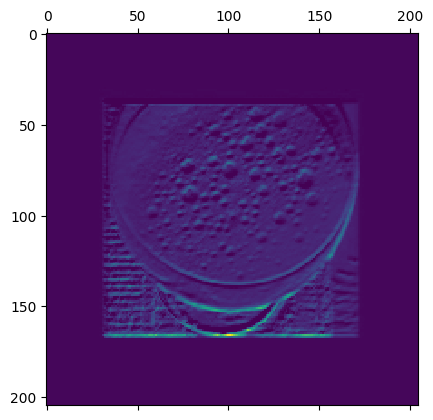

In [81]:

training_image = np.expand_dims(train_images[33], axis=0)

layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(training_image)

# It’s a 414 × 414 feature map with 32 channels. 
# 32 equals 32 filters output of the 1st conv2D layer

first_layer_activation = activations[2]
print(first_layer_activation.shape) 

# for i in range(-32, 33): 
#     print(f"channel no. {i}")
#     plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
#     plt.show()

# Assuming 'image_data' contains your image data in RGB format
image_data = first_layer_activation[0, :, :, -23]

# Display the activation map
plt.matshow(image_data, cmap='viridis')
plt.show()

# Save the activation map as an image
plt.imsave('aktivacia.jpg', image_data, cmap='viridis')


## Optimization

### Dataset with padding

In [302]:

# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = "/Users/vladkototh/Documents/development/artificial-intelligence/computer-vision/robot-object-recognition/research/data/images_with_padding_for_datagen"
train_dir = os.path.join(base_dir, 'train')
validate_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'train')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(416, 416),
    batch_size=8,
    class_mode='binary')  # Because you use binary_crossentropy loss, you need binary labels.

validate_generator = train_datagen.flow_from_directory(
    validate_dir,
    target_size=(416, 416),
    batch_size=8,
    class_mode='binary')


Found 64 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [303]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (8, 416, 416, 3)
labels batch shape: (8,)


In [ ]:

network = models.Sequential()

network.add(layers.Conv2D(
                filters=32, kernel_size=(3, 3), # strides=(1, 1), padding='valid', 
                activation='relu', input_shape=(416, 416, 3)
            ))

# network.add(layers.MaxPooling2D(pool_size=(2, 2))) #, strides=(2, 2), padding='valid'))

network.add(layers.Conv2D(
                filters=64, kernel_size=(3, 3), # strides=(1, 1), padding='valid', 
                activation='relu'
            ))

# network.add(layers.MaxPooling2D(pool_size=(2, 2)))#, strides=(2, 2), padding='valid'))

### simple feedforward neural network with fully connected layers ###

# Feedforward neural networks are typically used for tasks where the input data is represented as a flat vector, such as tabular data or 
# pre-extracted features. In the context of image data, the approach of flattening the image into a vector and feeding it directly into a 
# feedforward neural network is often less effective compared to using convolutional neural networks (CNNs).

# network consists of sequence of 2 Dense layers, which are densely/fully connected

network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(
                optimizer=Adam(learning_rate=0.001),
                # optimizer=optimizers.RMSprop(lr=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

network.fit(train_images_normalized, train_labels, 
            epochs=5, batch_size=8, 
            validation_data=(validate_images_normalized, validate_labels))

# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=30,
#       validation_data=validation_generator,
#       validation_steps=50)
            

Epoch 1/5
1/8 [==>...........................] - ETA: 17:27 - loss: 0.6573 - accuracy: 0.3750

### Dataset no padding

### Examples

In [ ]:

# Example 4

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,))) model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# l1
# regularizers.l1(0.001)

# simultaneous
# regularizers.l1_l2(l1=0.001, l2=0.001)


In [ ]:

# Example 5

### a feedforward neural network with fully connected layers, but with the addition of dropout regularization. ###

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# a dot product (dot) between the input tensor and a tensor named W
# an addition (+) between the resulting 2D ten- sor and a vector b
# a relu operation. relu(x) is max(x, 0)
output = relu(dot(W, input) + b)


### Own convnet

## Fit

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Optimization - data augmentation

In [ ]:

# DL with Python
# p. 138 - 142


# Optimize CNN with Keras

In [ ]:
# optimization
# Then data augmentation, a powerful technique for mitigating overfitting in computer vision
# use pretrained model, i.e. ImageNet

# another options
# feature extraction with a pretrained network
# fine-tuning a pretrained network
